# Homework 2

### Setup

In [1]:
import warnings
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold

def warn(*args, **kwargs): pass
warnings.warn = warn

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

### 1.

#### a.

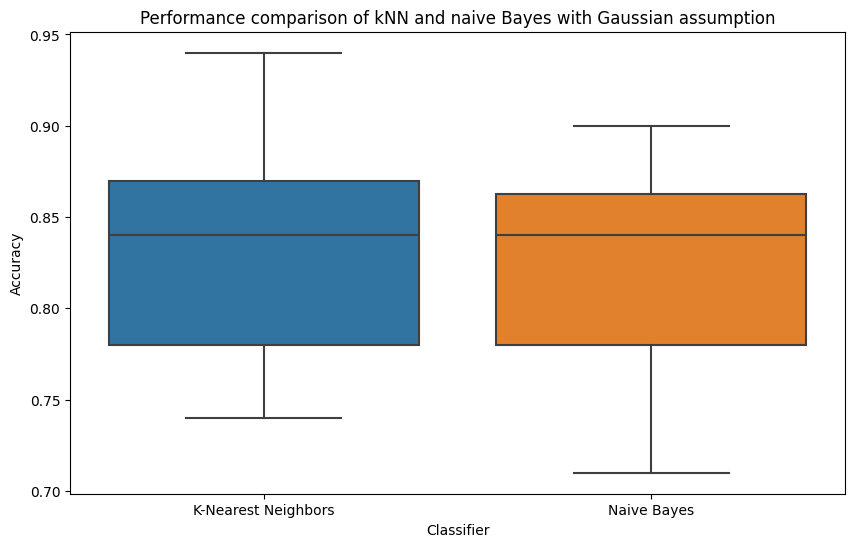

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()

knn_accuracy = []
naive_bayes_accuracy = []


folds = StratifiedKFold(n_splits=10, shuffle=True ,random_state=0)

for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracy.append(round(metrics.accuracy_score(y_test, y_pred),2))

    naive_bayes.fit(X_train, y_train)
    y_pred = naive_bayes.predict(X_test)
    naive_bayes_accuracy.append(round(metrics.accuracy_score(y_test, y_pred),2))

knn_data = pd.DataFrame({
    'Classifier': 'K-Nearest Neighbors',
    'Accuracy': knn_accuracy
})

naive_bayes_data = pd.DataFrame({
    'Classifier': 'Naive Bayes',
    'Accuracy': naive_bayes_accuracy
})

data = pd.concat([knn_data, naive_bayes_data])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Classifier', y='Accuracy', data=data)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Performance comparison of kNN and naive Bayes with Gaussian assumption')
plt.show()

#### b.

In [3]:
from scipy import stats

pvalue = round(stats.ttest_rel(knn_accuracy, naive_bayes_accuracy, alternative='greater').pvalue, 2)
print("knn > Naive Bayes ?, p-value = ",pvalue)

knn > Naive Bayes ?, p-value =  0.17


*Conclusão*: Podemos afirmar que o kNN é estatísticamente superior ao naive Bayes para um nível de significância maior que 0.17. Para o nível de significância 0.05, frequentemente usado, não podemos rejeitar a hipótese nula nem fazer a conclusão desejada.

### 2.

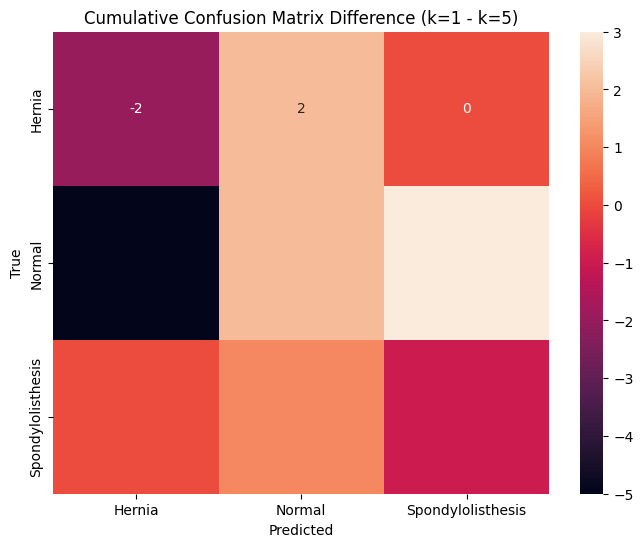

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_1_cm = np.zeros((3, 3), dtype=np.int64)
knn_5_cm = np.zeros((3, 3), dtype=np.int64)

folds = StratifiedKFold(n_splits=10, shuffle=True ,random_state=0)

labels = np.unique(y)

for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]

    knn_1.fit(X_train, y_train)
    y_pred = knn_1.predict(X_test)
    knn_1_cm += np.array(confusion_matrix(y_test, y_pred, labels=labels))

    knn_5.fit(X_train, y_train)
    y_pred = knn_5.predict(X_test)
    knn_5_cm += np.array(confusion_matrix(y_test, y_pred, labels=labels))

difference = knn_1_cm - knn_5_cm

plt.figure(figsize=(8, 6))
sns.heatmap(difference, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Cumulative Confusion Matrix Difference (k=1 - k=5)')
plt.show()

Considerando as pessoas saudáveis como a nossa target class, o modelo kNN de 5 vizinhos apresenta mais verdadeiros negativos e mais falsos negativos, diagnosticando mais vezes pessoas saudáveis com Hernia.
O modelo kNN de 1 vizinho apresenta mais verdadeiros positivos e mais falsos positivos, diagnosticando mais vezes pessoas saudáveis com Spondylolisthesis.
Com vista a isto, cabe ao profissional de saúde deliberar qual o tipo de erro mais grave e escolher o modelo mais adequado consoante isso. É preferível diagonosticar pessoas saudáveis como estando doentes (erro tipo 2, mais frequente no modelo de 5 vizinhos) ou diagonosticar pessoas doentes como sendo saudáveis (erro tipo 1, mais frequente no modelo de 1 vizinho)?

### 3.

A primeira dificuldade do naive Bayes deve-se à assunção de indepêndencia condicional entre as variáveis, o que pode não ser necessariamente correto (pelvic tilt pode impactar pelvic radius, por exemplo).
A segunda é relativa ao tamanho do dataset em questão, que é bastante reduzido, e ao facto do naive Bayes encontrar dificuldades quando a amostra utilizada para treino é pequena.